In [1]:
import pandas as pd
import psycopg2 as pg
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import json

In [2]:
# 1 Read config file
with open("config.json") as json_data_file:
    data = json.load(json_data_file)

# 2 Set DB 
engine = create_engine('postgresql://{0}:{1}@{2}:{3}/{4}'\
                       .format(data["user"],data["pwd"],data["host"],data["port"],data["db_name"]))

# 3 Create connection 
connection = engine.connect()   

### The most common salary ranges for employees

In [3]:
# Retrieve the data
common_s='select salary\
           from salaries'

common_ex=connection.execute(common_s)
df_common=pd.DataFrame(common_ex)
df_common=df_common.rename(columns={0:"salary"})

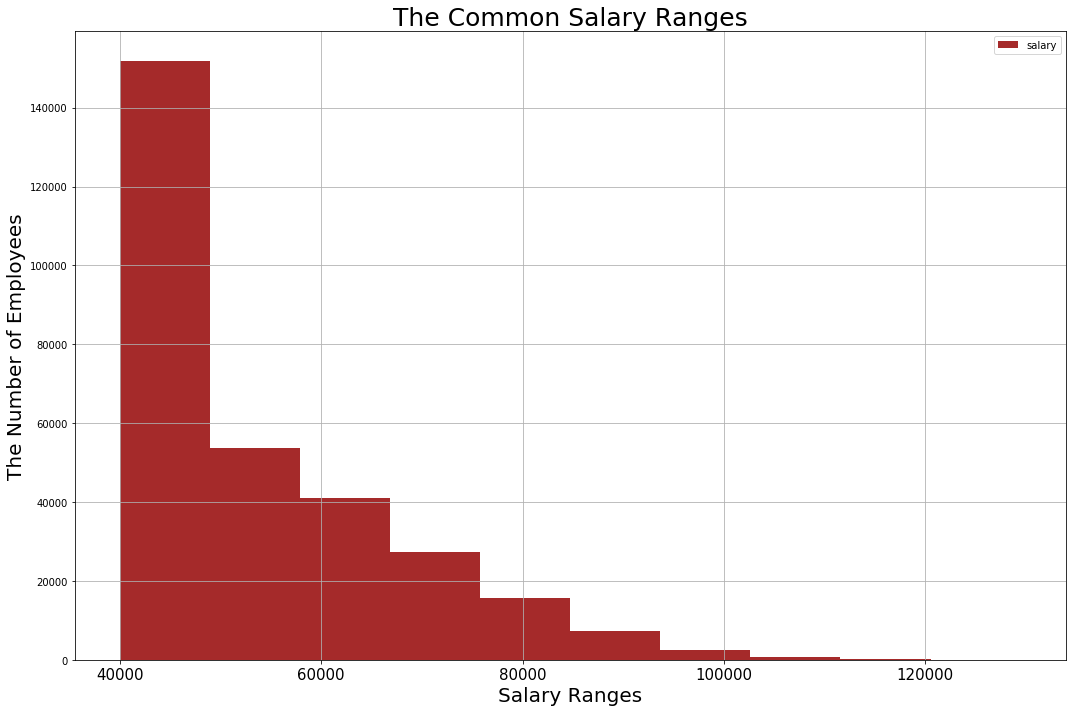

In [4]:
# Plotplot Histogram
df_common.plot.hist(bins=10,figsize=(15,10),color='brown')
plt.title("The Common Salary Ranges",fontSize=25)
plt.xticks(fontSize=15)
plt.xlabel("Salary Ranges",fontSize=20)
plt.ylabel("The Number of Employees",fontSize=20)
plt.grid()
plt.tight_layout()
plt.show()

### The average salary by title

In [5]:
# Retrieve the data
salary='select title,\
        Round(avg(salary),2) as avg_salary \
        from salaries as s \
        inner join titles as t \
        on s.emp_no=t.emp_no \
        group by title'
salary_ex=connection.execute(salary)
df=pd.DataFrame(salary_ex)
df_ren=df.rename(columns = {0: 'title', 1: 'avg_salary'})
df_ren["avg_salary"] = pd.to_numeric(df_ren["avg_salary"], downcast="float")

In [6]:
df_ren=df_ren.set_index("title")
df_ren

,avg_salary
title,
Assistant Engineer,48493.199219
Engineer,48539.781250
Manager,51531.039062
Senior Engineer,48506.750000
Senior Staff,58503.289062
Staff,58465.269531
Technique Leader,48580.511719


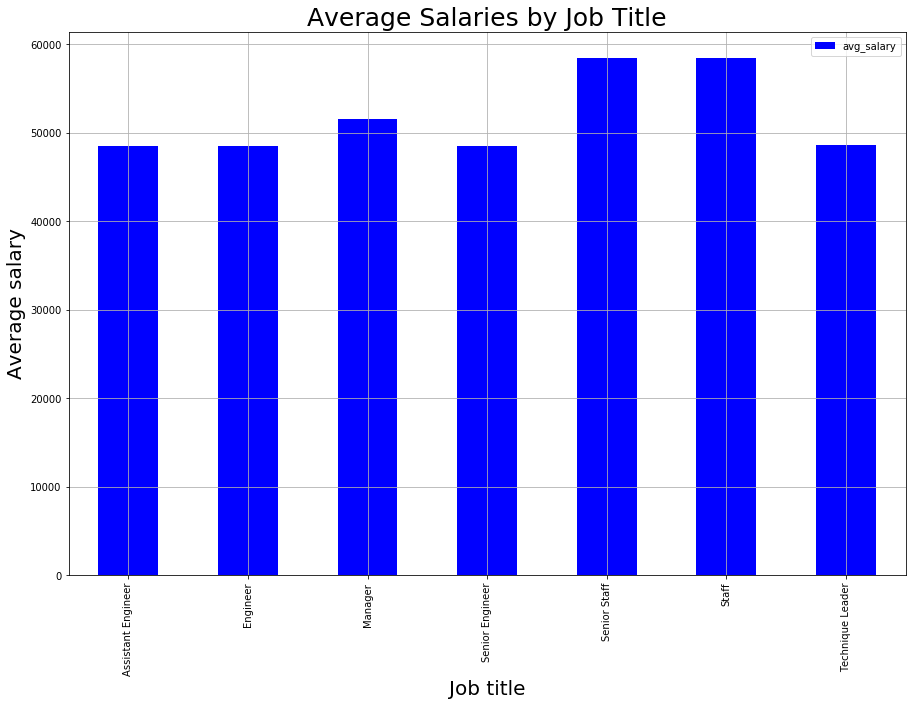

In [7]:
# Plot a bar chart
pandas_bar=df_ren.plot(kind="bar",figsize=(15,10),color='blue')
plt.title("Average Salaries by Job Title",fontSize=25)
plt.xlabel("Job title",fontSize=20)
plt.ylabel("Average salary",fontSize=20)
plt.grid()
plt.show()